In [1]:
import sys
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Double exotic fermion decay

In [8]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

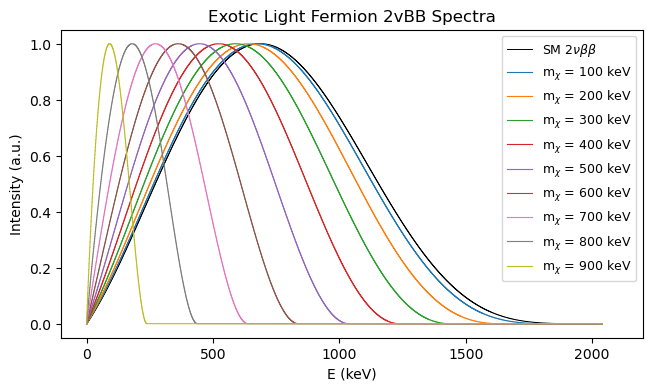

In [9]:
light_fermion_masses_keV = np.arange(100, 1000, 100)
def_signal_dist          = []

for idx, fmass_keV in enumerate(light_fermion_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/double_ferm/76Ge_2vbb_mnu_{}_{}_keV/76Ge_sums.txt'.format(fmass_keV, fmass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    def_signal_dist.append(sdist)
    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, fmass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fmass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Exotic Light Fermion 2vBB Spectra')
ax.legend(fontsize=9)
plt.show()

# Sensitivity:

### L200 background data

In [10]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

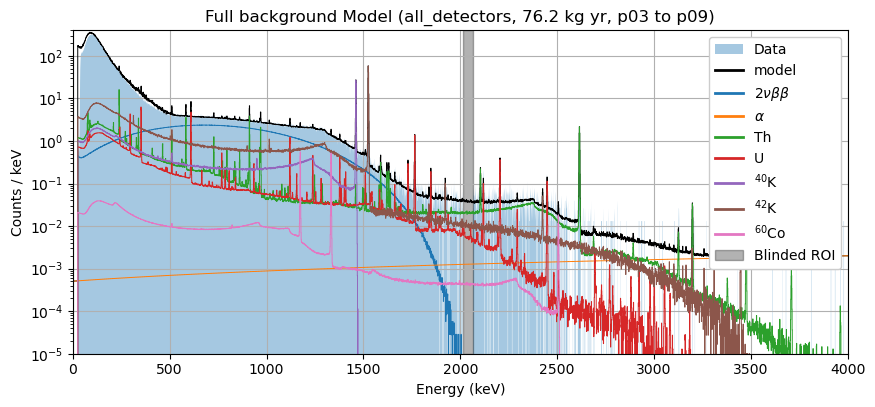

In [11]:
fig, ax = plt.subplots(figsize=(10, 4.2))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
leg = ax.legend(loc='upper right', framealpha=1)
for line in leg.get_lines():
    line.set_linewidth(2)
ax.set_yscale('log')
#ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_title(f'Full background Model (all_detectors, {L200_data_exposure} kg yr, p03 to p09)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy (keV)')
#ax.set_ylim(1e-4, 4e2)
ax.set_ylim(1e-5, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

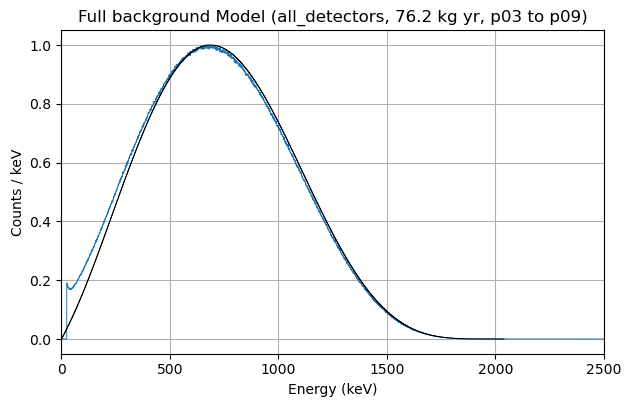

In [12]:
fig, ax = plt.subplots(figsize=(7, 4.2))
ax.step(bckg_bins, vvBB_model/np.max(vvBB_model),            lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bins,      sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')
for line in leg.get_lines():
    line.set_linewidth(2)
#ax.set_yscale('log')
ax.set_title(f'Full background Model (all_detectors, {L200_data_exposure} kg yr, p03 to p09)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_ylabel('Counts / keV')
ax.set_xlabel('Energy (keV)')
ax.set_xlim(0, 2500)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

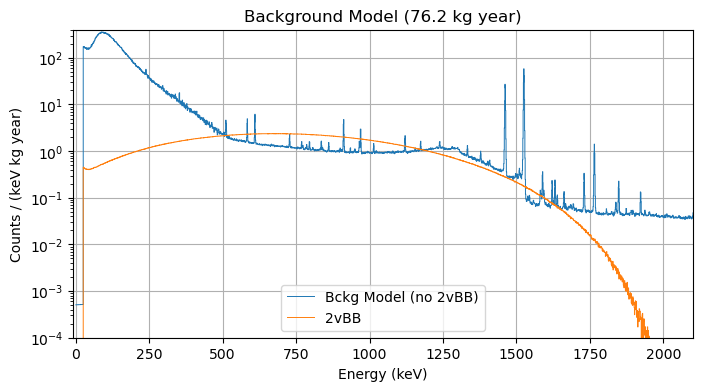

In [13]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Double exotic fermion decay

In [14]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 30
max_bin = 2010

# explain?
eff = 0.75

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

exposure = L200_data_exposure

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

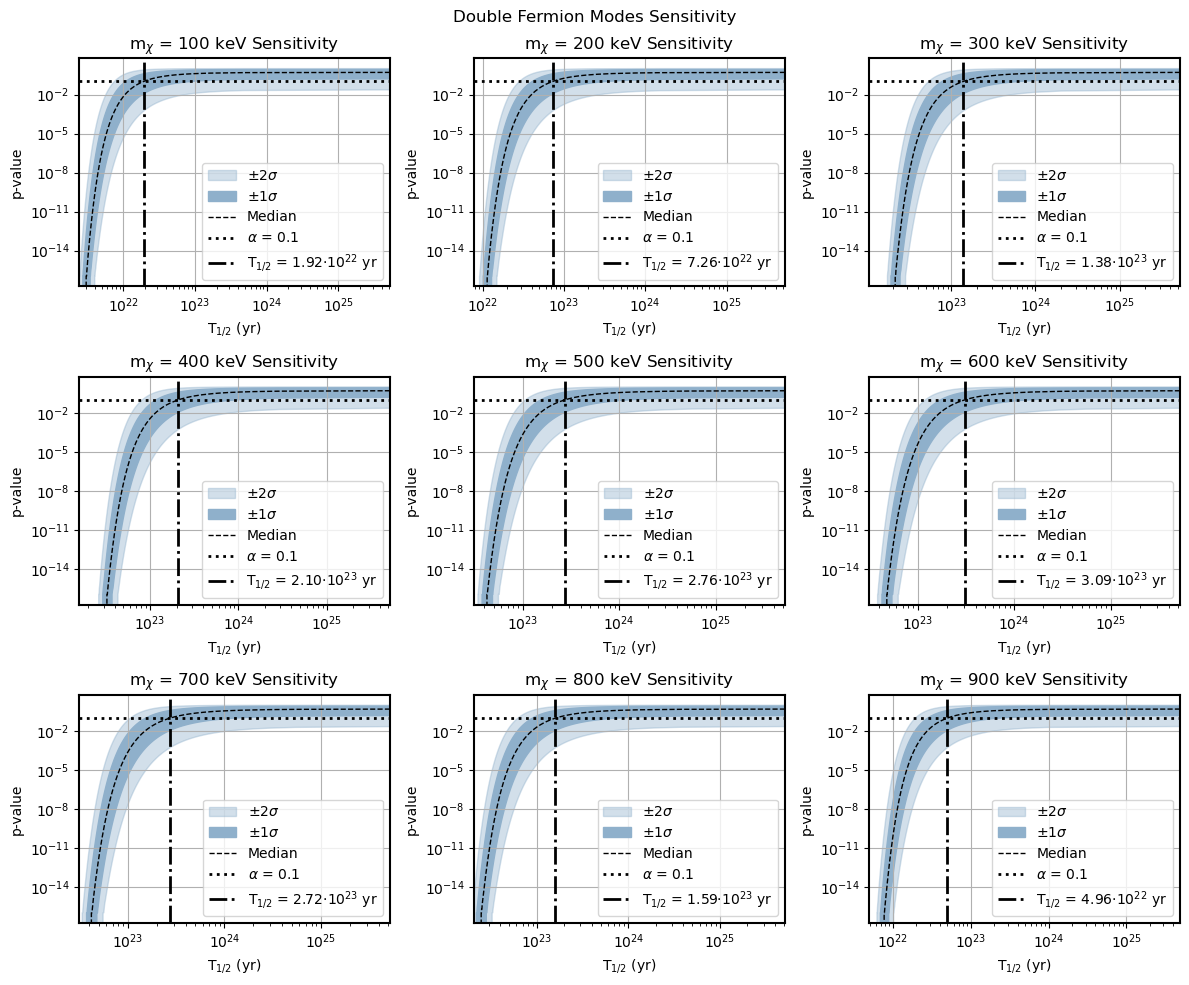

In [15]:
labels       = ['m_chi_'         + str(fmass_keV) + '_keV' for fmass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fmass_keV) + ' keV' for fmass_keV in light_fermion_masses_keV]
n_max_list   = [130000, 40000, 30000, 20000, 10000, 10000, 10000, 15000, 60000]
n_min_list   = [6 for i in range(len(n_max_list))]


# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

#all_half_life_sens = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_min, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_min_list, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fmass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    #all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(min(half_life), max(half_life))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/doubleF_' + lab + '.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/doubleF_combined.pdf', bbox_inches='tight')
plt.show()

### Choose same range for all cases

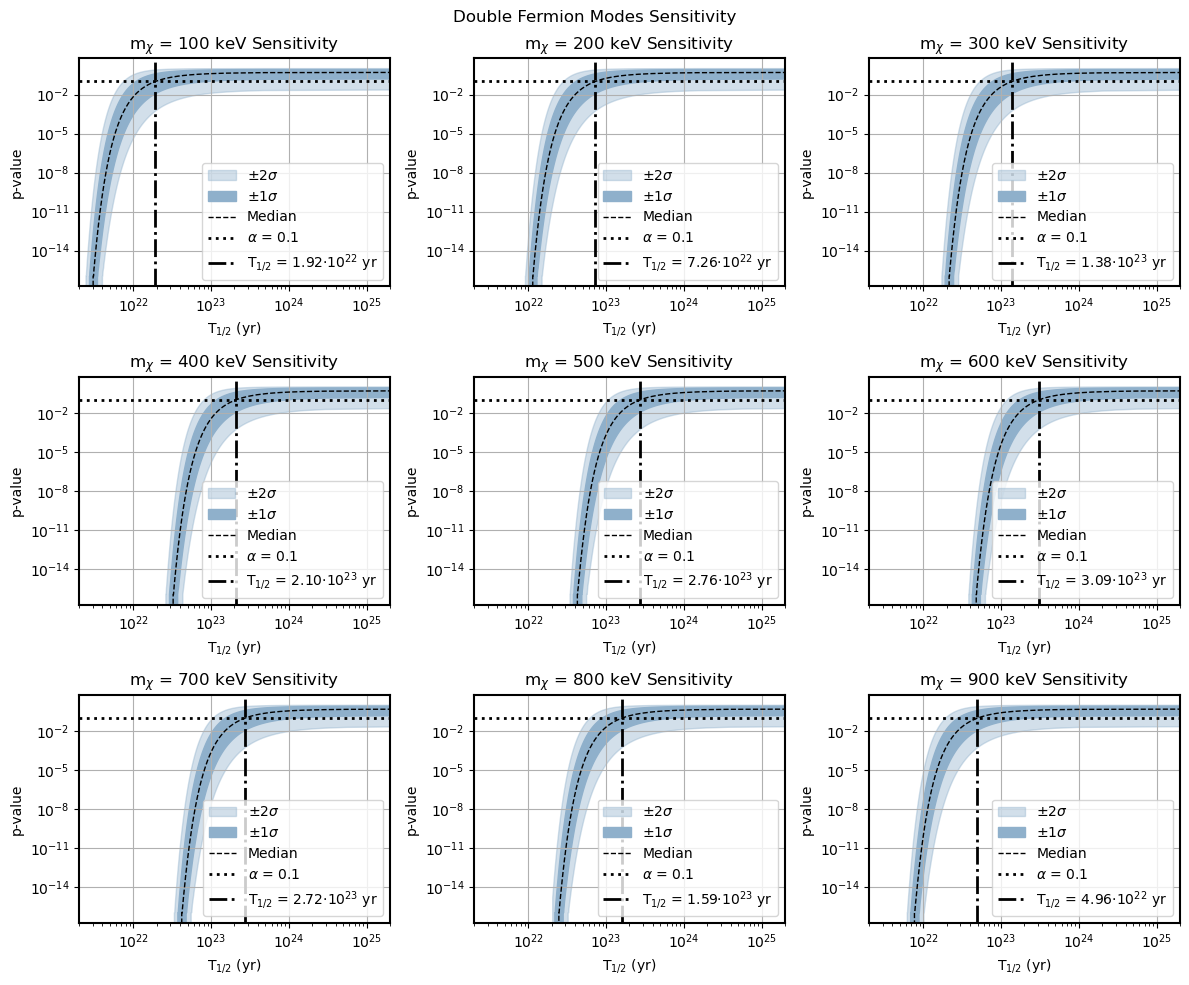

In [16]:
# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

all_half_life_sens = []
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_min, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_min_list, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fmass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    
    all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(2e21, 2e25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/doubleF_' + lab + '.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/doubleF_combined.pdf', bbox_inches='tight')
plt.show()

In [17]:
sys.path.append('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/')

from analytic_phase_space_factors import G0, keV


me  = 0.511 # in MeV
fm  = 1./197 # in keV^-1
pi  = math.pi
gA2 = math.pow(1.2724, 2) #gA from PDG
A   = 75.921
R   = 1.2 * math.pow(A, 1 / 3) * fm

def coupling(half_life, NME, PS):
    g2 = 1. / (half_life * PS) * 8 * math.pow(pi * R / me / NME, 2)
    return math.sqrt(g2)

coupling_min        = []
coupling_max        = []
fitted_f_masses_keV = []
M_0n_1              = gA2 * 2.66  # Reference? BSM whitepaper cites it 203-213 as variance in NME calculations
M_0n_2              = gA2 * 6.04  # Reference?

for model_label, model_label_fancy, fmass_keV, half_life_sens in zip(labels, labels_fancy, light_fermion_masses_keV, all_half_life_sens):
    # Check if we skipped this fit due to fit bounds
    if half_life_sens is None:
        continue

    ps    = G0(fmass_keV * keV, fmass_keV * keV)
    g_min = coupling(half_life_sens, M_0n_2, ps)
    g_max = coupling(half_life_sens, M_0n_1, ps)

    fitted_f_masses_keV.append(fmass_keV)
    coupling_min       .append(g_min)
    coupling_max       .append(g_max)

    print(('Model = {}, half-life = {} yr, Coupling_min = {}, Coupling_max={}'.format(model_label_fancy, half_life_sens, g_min, g_max)))

Model = m$_{\chi}$ = 100 keV, half-life = 1.918956144980743e+22 yr, Coupling_min = 0.0016236154312487695, Coupling_max=0.003686705716068635
Model = m$_{\chi}$ = 200 keV, half-life = 7.26180441201395e+22 yr, Coupling_min = 0.0009310566467302078, Coupling_max=0.002114128626409946
Model = m$_{\chi}$ = 300 keV, half-life = 1.3764194796401144e+23 yr, Coupling_min = 0.0008067773368858974, Coupling_max=0.0018319304942822634
Model = m$_{\chi}$ = 400 keV, half-life = 2.096915189252448e+23 yr, Coupling_min = 0.0008358475211962656, Coupling_max=0.0018979394842200922
Model = m$_{\chi}$ = 500 keV, half-life = 2.755534730310003e+23 yr, Coupling_min = 0.001009169149010296, Coupling_max=0.002291496864669996
Model = m$_{\chi}$ = 600 keV, half-life = 3.086942535947522e+23 yr, Coupling_min = 0.001457611185271013, Coupling_max=0.003309763743998842
Model = m$_{\chi}$ = 700 keV, half-life = 2.7226655645505704e+23 yr, Coupling_min = 0.002728697140804112, Coupling_max=0.006195988996412345
Model = m$_{\chi}$ =

In [18]:
### Save computed data
filename = f'./results/sensitivity_doubleF_LEGEND200_fit_{min_bin}_{max_bin}_all_dets.npz'
np.savez(filename, masses=fitted_f_masses_keV, limits=[coupling_min, coupling_max])

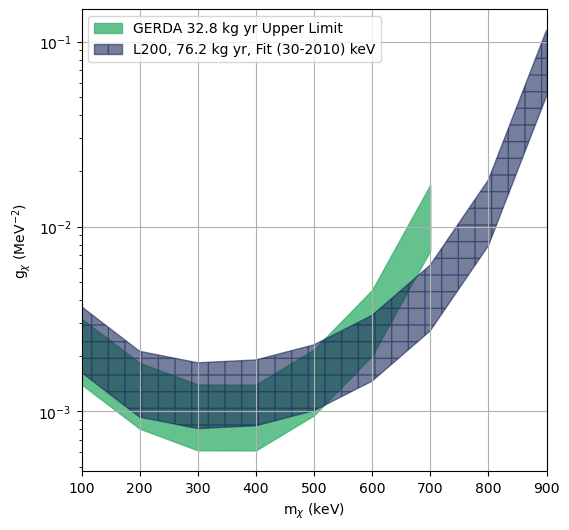

In [19]:
#GERDA 32.8 kg yr
data_doubleF_gerda   = np.load('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/results/results_gerda2022_double-fermions_all.npz')
masses_doubleF_gerda = data_doubleF_gerda['masses']
limits_doubleF_gerda = data_doubleF_gerda['limits']

# LEGEND
filename            = f'./results/sensitivity_doubleF_LEGEND200_fit_{min_bin}_{max_bin}_all_dets.npz'
data_doubleF_full   = np.load(filename)
masses_doubleF_full = data_doubleF_full['masses']
limits_doubleF_full = data_doubleF_full['limits']

#plot
fig, ax = plt.subplots(figsize=(6,6))
ax.fill_between(masses_doubleF_gerda, limits_doubleF_gerda[0], limits_doubleF_gerda[1], label='GERDA 32.8 kg yr Upper Limit', color='mediumseagreen', alpha=0.8)
ax.fill_between(masses_doubleF_full,  limits_doubleF_full [0], limits_doubleF_full [1], label=f'L200, {L200_data_exposure} kg yr, Fit ({min_bin}-{max_bin}) keV', facecolor='#1A2A5B', hatch='+', edgecolor='#1A2A5B', alpha=0.6)
ax.set_yscale('log')
ax.set_xlim(100,900)
ax.set_xlabel(r'm$_\chi$ (keV)')
ax.set_ylabel(r'g$_\chi$ (MeV$^{-2}$)')
ax.legend(loc='upper left')
ax.grid()

#plt.savefig('./images/doubleF_sensit_comparison_GERDA.pdf', bbox_inches='tight')

## Energy range to study: (500, 2010 keV)

In [20]:
# Fit range left endpoints min and max inclusive [min, max]
min_bin = 500
max_bin = 2010

limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

exposure = L200_data_exposure

Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

800
900


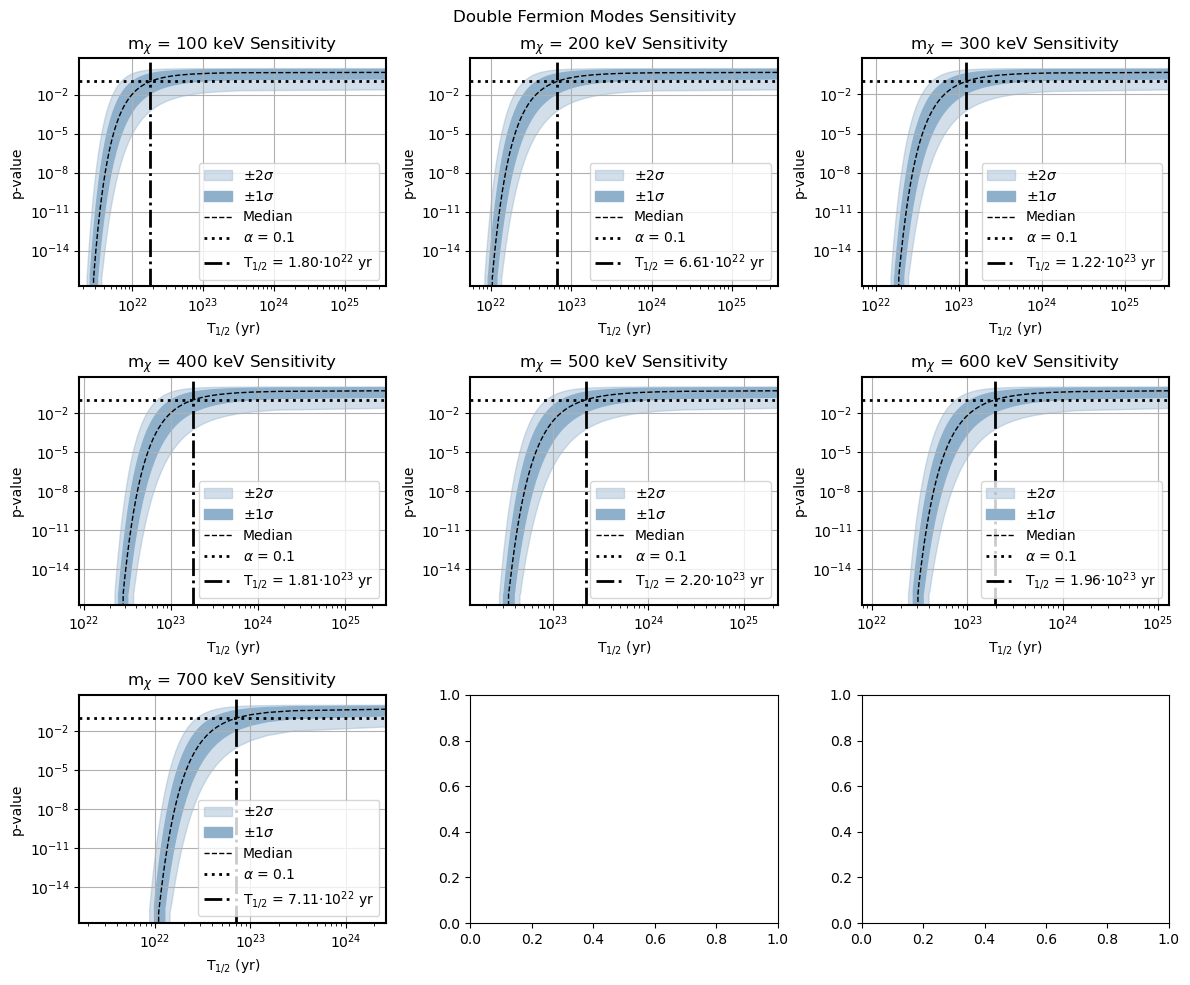

In [21]:
n_max_list   = [130000, 40000, 30000, 20000, 10000, 10000, 10000, 15000, 60000]
n_min_list   = [6 for i in range(len(n_max_list))]

# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

all_half_life_sens2 = []
light_f_masses_keV2 = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_min, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_min_list, n_max_list)):
    if 2039 - 2 * fmass_keV < min_bin:
        print(fmass_keV)
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)

    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    all_half_life_sens2.append(half_life_sens)
    light_f_masses_keV2.append(fmass_keV)
    
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(min(half_life), max(half_life))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    #fig.savefig('./images/doubleF_' + lab + '_min_bin_500keV.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
#combined_fig.savefig('./images/doubleF_combined_min_bin_500keV.pdf', bbox_inches='tight')
plt.show()

In [22]:
coupling_min        = []
coupling_max        = []
fitted_f_masses_keV = []
M_0n_1              = gA2 * 2.66  # Reference? BSM whitepaper cites it 203-213 as variance in NME calculations
M_0n_2              = gA2 * 6.04  # Reference?

for model_label, model_label_fancy, fmass_keV, half_life_sens in zip(labels, labels_fancy, light_f_masses_keV2, all_half_life_sens2):
    if half_life_sens is None:
        continue

    ps    = G0(fmass_keV * keV, fmass_keV * keV)
    g_min = coupling(half_life_sens, M_0n_2, ps)
    g_max = coupling(half_life_sens, M_0n_1, ps)

    fitted_f_masses_keV.append(fmass_keV)
    coupling_min       .append(g_min)
    coupling_max       .append(g_max)

    print(('Model = {}, half-life = {} yr, Coupling_min = {}, Coupling_max={}'.format(model_label_fancy, half_life_sens, g_min, g_max)))

Model = m$_{\chi}$ = 100 keV, half-life = 1.798859166034463e+22 yr, Coupling_min = 0.0016769384143631662, Coupling_max=0.003807784970959972
Model = m$_{\chi}$ = 200 keV, half-life = 6.609422891221453e+22 yr, Coupling_min = 0.0009759253710824461, Coupling_max=0.002216010992984201
Model = m$_{\chi}$ = 300 keV, half-life = 1.2191257018578479e+23 yr, Coupling_min = 0.0008572447844459553, Coupling_max=0.0019465257511479589
Model = m$_{\chi}$ = 400 keV, half-life = 1.80923734341264e+23 yr, Coupling_min = 0.0008998491692322492, Coupling_max=0.0020432665346476636
Model = m$_{\chi}$ = 500 keV, half-life = 2.201084003590463e+23 yr, Coupling_min = 0.001129142102140508, Coupling_max=0.0025639166529807023
Model = m$_{\chi}$ = 600 keV, half-life = 1.9562079930027214e+23 yr, Coupling_min = 0.0018310426076500086, Coupling_max=0.004157705770754155
Model = m$_{\chi}$ = 700 keV, half-life = 7.1069242495519605e+22 yr, Coupling_min = 0.005340865508436268, Coupling_max=0.012127378823667316


In [23]:
### Save computed data
filename = f'./results/sensitivity_doubleF_LEGEND200_fit_{min_bin}_{max_bin}_all_dets.npz'
np.savez(filename, masses=fitted_f_masses_keV, limits=[coupling_min, coupling_max])

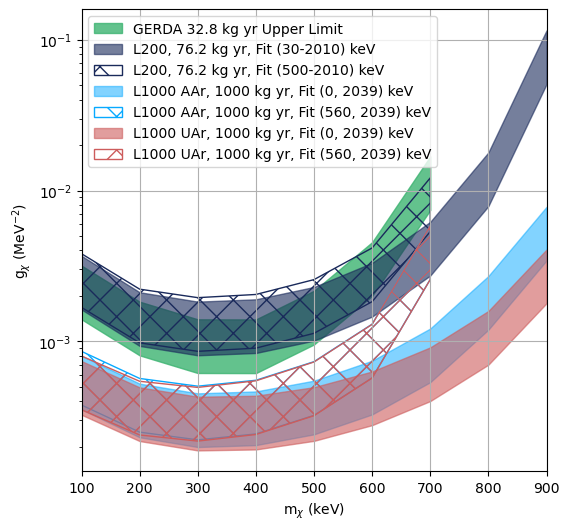

In [25]:
#GERDA 32.8 kg yr
filespath            = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/results/'
data_doubleF_gerda   = np.load(filespath + 'results_gerda2022_double-fermions_all.npz')
masses_doubleF_gerda = data_doubleF_gerda['masses']
limits_doubleF_gerda = data_doubleF_gerda['limits']

# LEGEND 200
min_bin0 = 30
max_bin  = 2010
min_bin1 = 500
filename0           = f'./results/sensitivity_doubleF_LEGEND200_fit_{min_bin0}_{max_bin}_all_dets.npz'
data_doubleF_full   = np.load(filename0)
masses_doubleF_full = data_doubleF_full['masses']
limits_doubleF_full = data_doubleF_full['limits']

filename1           = f'./results/sensitivity_doubleF_LEGEND200_fit_{min_bin1}_{max_bin}_all_dets.npz'
data_doubleF_part   = np.load(filename1)
masses_doubleF_part = data_doubleF_part['masses']
limits_doubleF_part = data_doubleF_part['limits']

# LEGEND 1000
data_doubleF_L1000_atm_full      = np.load(filespath + 'sensitivity_doubleF_LEGEND1000_Ar_red_1_fit_0_2039.npz')
data_doubleF_L1000_atm_partial   = np.load(filespath + 'sensitivity_doubleF_LEGEND1000_Ar_red_1_fit_560_2039.npz')
data_doubleF_L1000_ug_full       = np.load(filespath + 'sensitivity_doubleF_LEGEND1000_Ar_red_1400_fit_0_2039.npz')
data_doubleF_L1000_ug_partial    = np.load(filespath + 'sensitivity_doubleF_LEGEND1000_Ar_red_1400_fit_560_2039.npz')

masses_doubleF_L1000_atm_full    = data_doubleF_L1000_atm_full   ['masses']
limits_doubleF_L1000_atm_full    = data_doubleF_L1000_atm_full   ['limits']
masses_doubleF_L1000_atm_partial = data_doubleF_L1000_atm_partial['masses']
limits_doubleF_L1000_atm_partial = data_doubleF_L1000_atm_partial['limits']
masses_doubleF_L1000_ug_full     = data_doubleF_L1000_ug_full    ['masses']
limits_doubleF_L1000_ug_full     = data_doubleF_L1000_ug_full    ['limits']
masses_doubleF_L1000_ug_partial  = data_doubleF_L1000_ug_partial ['masses']
limits_doubleF_L1000_ug_partial  = data_doubleF_L1000_ug_partial ['limits']


fig, ax = plt.subplots(figsize=(6,6))
ax.fill_between(masses_doubleF_gerda, limits_doubleF_gerda[0], limits_doubleF_gerda[1], label='GERDA 32.8 kg yr Upper Limit', color='mediumseagreen', alpha=0.8)
ax.fill_between(masses_doubleF_full,  limits_doubleF_full [0],  limits_doubleF_full [1], label=f'L200, {L200_data_exposure} kg yr, Fit ({min_bin0}-{max_bin}) keV', color='#1A2A5B', alpha=0.6)
ax.fill_between(masses_doubleF_part,  limits_doubleF_part [0],  limits_doubleF_part [1], label=f'L200, {L200_data_exposure} kg yr, Fit ({min_bin1}-{max_bin}) keV', facecolor='None', hatch='x', edgecolor='#1A2A5B')
ax.fill_between(masses_doubleF_L1000_atm_full,    limits_doubleF_L1000_atm_full   [0], limits_doubleF_L1000_atm_full   [1], label=f'L1000 AAr, 1000 kg yr, Fit (0, 2039) keV',   color='#07A9FF', alpha=0.5)
ax.fill_between(masses_doubleF_L1000_atm_partial, limits_doubleF_L1000_atm_partial[0], limits_doubleF_L1000_atm_partial[1], label=f'L1000 AAr, 1000 kg yr, Fit (560, 2039) keV', facecolor='None', hatch='x', edgecolor='#07A9FF')
ax.fill_between(masses_doubleF_L1000_ug_full,     limits_doubleF_L1000_ug_full    [0], limits_doubleF_L1000_ug_full    [1], label=f'L1000 UAr, 1000 kg yr, Fit (0, 2039) keV',   color='indianred', alpha=0.6)
ax.fill_between(masses_doubleF_L1000_ug_partial,  limits_doubleF_L1000_ug_partial [0], limits_doubleF_L1000_ug_partial [1], label=f'L1000 UAr, 1000 kg yr, Fit (560, 2039) keV', facecolor='None', hatch='x', edgecolor='indianred')
ax.set_yscale('log')
ax.set_xlim(100,900)
ax.set_xlabel(r'm$_\chi$ (keV)')
ax.set_ylabel(r'g$_\chi$ (MeV$^{-2}$)')
ax.legend(loc='upper left')
ax.grid()

#plt.savefig('./images/doubleF_sensit_comparison_all.pdf', bbox_inches='tight')

## Tests

In [ ]:
lab       = labels                  [8]
lab_fancy = labels_fancy            [8]
sig_dist  = def_signal_dist         [8]
fmass_keV = light_fermion_masses_keV[8]
#n_max     = n_max_list             [8]
n_min     = 6

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle(lab_fancy)

for n_max, ax in zip([50000, 60000], axs.flatten()):
    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)
    
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    
    ax.fill_between(half_life, expected[3], expected[4], color='gold', label=r'$\pm 2\sigma$', alpha=0.5)
    ax.fill_between(half_life, expected[1], expected[2], color='mediumseagreen', label=r'$\pm 1\sigma$')
    ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
    ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
    ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
    set_border_line_width(ax, 1.5)
    ax.set_title(f'nmin = {n_min}, nmax = {n_max}')
    ax.set_xlabel(r'T$_{1/2}$ (yr)')
    ax.set_ylabel('p-value')
    #ax.set_xlim(min(half_life), max(half_life))
    ax.set_xlim(2e21, 5e25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower right')
    ax.grid()

plt.show()

In [ ]:
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fmass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 30., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    
    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('n_signal_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)